# DIGIT RECOGNIZER

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### PRÉPARATION DES DONNÉES

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # images 28x28 en niveaux de gris

# Normalisation entre 0 et 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### ENTRAINEMENT DU MODÈLE

In [3]:
model = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 91ms/step - accuracy: 0.8409 - loss: 0.5408 - val_accuracy: 0.9797 - val_loss: 0.0652
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - accuracy: 0.9791 - loss: 0.0691 - val_accuracy: 0.9876 - val_loss: 0.0384
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9867 - loss: 0.0439 - val_accuracy: 0.9885 - val_loss: 0.0350
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9902 - loss: 0.0321 - val_accuracy: 0.9886 - val_loss: 0.0361
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9920 - loss: 0.0253 - val_accuracy: 0.9902 - val_loss: 0.0313
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.9939 - loss: 0.0210 - val_accuracy: 0.9901 - val_loss: 0.0303
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9948 - loss: 0.0172 - val_accuracy: 0.9893 - val_loss: 0.0334
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9955 - loss: 0.0142 - 

### ÉVALUATION DES PERFORMANCES

In [4]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy : {accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9846 - loss: 0.0507
Accuracy : 98.77%


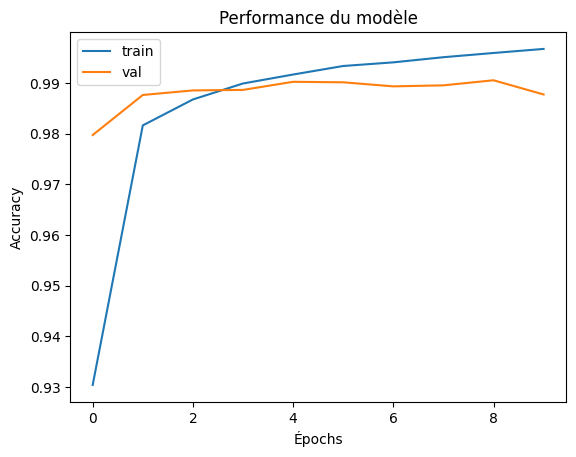

In [5]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Performance du modèle")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


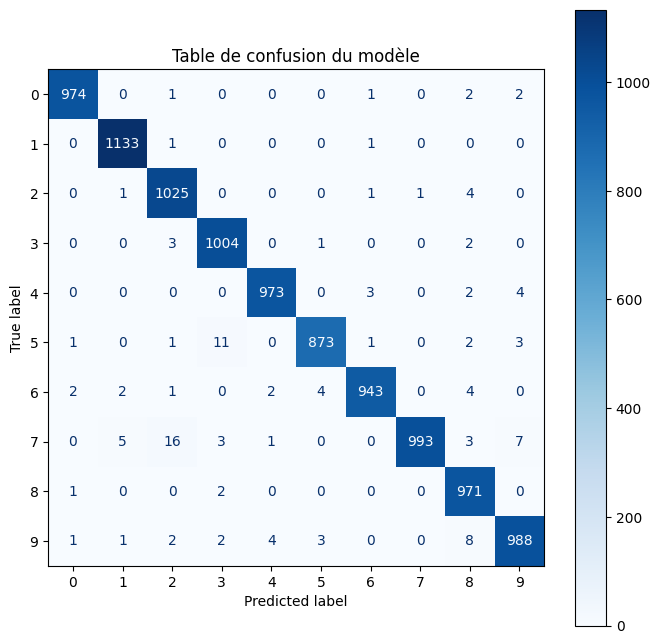

In [6]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax, cmap='Blues')
plt.title('Table de confusion du modèle')
plt.show()

SAUVEGARDE DU MODÈLE

In [ ]:
accuracy_percent = int(accuracy * 10000) / 100
model.save(f"model-{accuracy_percent:.2f}.keras")
print(f"Modèle sauvegardé sous 'model-{accuracy_percent:.2f}.keras'")

Modèle sauvegardé sous 'model.keras'
